In [42]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator,SparsePauliOp
from qiskit.primitives import StatevectorEstimator,StatevectorSampler
qubits=3
qc1=TwoLocal(qubits,rotation_blocks=["rx"],entanglement_blocks="cx",reps=1)
# qc2=TwoLocal(qubits,rotation_blocks=["ry"],entanglement="None",reps=0)
# unique_params_qc1 = [Parameter(f"theta1_{i}") for i in range(qc1.num_parameters)]
# unique_params_qc2 = [Parameter(f"theta2_{i}") for i in range(qc2.num_parameters)]
#
# # Assign the unique parameters to the circuits
# qc1 = qc1.assign_parameters(unique_params_qc1)
# qc2 = qc2.assign_parameters(unique_params_qc2)
#
# # Compose the circuits
# qc3 = qc1.compose(qc2, inplace=False)
# qc3.decompose().draw("mpl")

12
DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>), meas=BitArray(<shape=(), num_shots=1024, num_bits=3>))


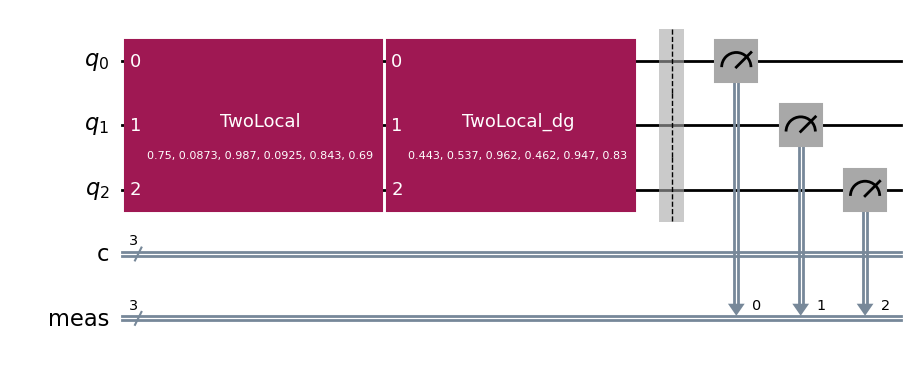

In [68]:
qc4=TwoLocal(qubits,rotation_blocks=["rx"],entanglement_blocks="cx",reps=1)
qc1=TwoLocal(qubits,rotation_blocks=["rx"],entanglement_blocks="cx",reps=1)
unique_params_qc1=[Parameter(f"theta1_{i}") for i in range(qc1.num_parameters)]
unique_params_qc4=[Parameter(f"theta4_{i}") for i in range(qc4.num_parameters)]
qc1 = qc1.assign_parameters(unique_params_qc1)
qc4 = qc4.assign_parameters(unique_params_qc4)
z=qc1.compose(qc4.inverse())
z1=QuantumCircuit(qubits,qubits)
z2=z1.compose(z)
z2.measure_all()
print(z2.num_parameters)
params_in=np.random.rand(z.num_parameters)
z2=z2.assign_parameters(params_in)
sampler=StatevectorSampler()
job=sampler.run([z2]).result()[0].data
print(job)
z2.draw("mpl")


In [ ]:
def objective(params):
    estimator=StatevectorEstimator()
    val_exp=estimator.run([(z,SparsePauliOp.from_operator(Operator(np.eye(2**qubits))),[params])]).result()[0].data.evs
    return cost